In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the Excel file (adjust the path if needed)
df = pd.read_excel("Online Retail.xlsx", sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum() #### there is 1454 null values in description and 135080 null values in customer id 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna(subset=['CustomerID'])  #### removing rows with missing customer id 

In [7]:
df = df[df['Quantity'] > 0] ### removing negative or zero quantities 

In [8]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[~df['InvoiceNo'].str.startswith('C')]   ### removing cancelled transactions ussually starts with "C".

In [10]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #### adding total price column 

df.to_csv("cleaned_online_retail.csv", index=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397924.000000,397924,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394749
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.420210,NaN,22.096788,1713.169877,309.055588


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
print("Rows and Columns:", df.shape)

Rows and Columns: (397924, 9)


In [19]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [22]:
###df.describe()


total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue : £{total_revenue:.2f}")  #### summary statistics 

Total Revenue : £8911407.90


In [23]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
print(top_products)  #### top 10 selling products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [24]:
top_revenue_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending = False).head(10)
print(top_revenue_products)  #### top 10 revenue generating products 

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


In [25]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending = False)
print(country_sales.head(10))  ##### sales by countries 

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64


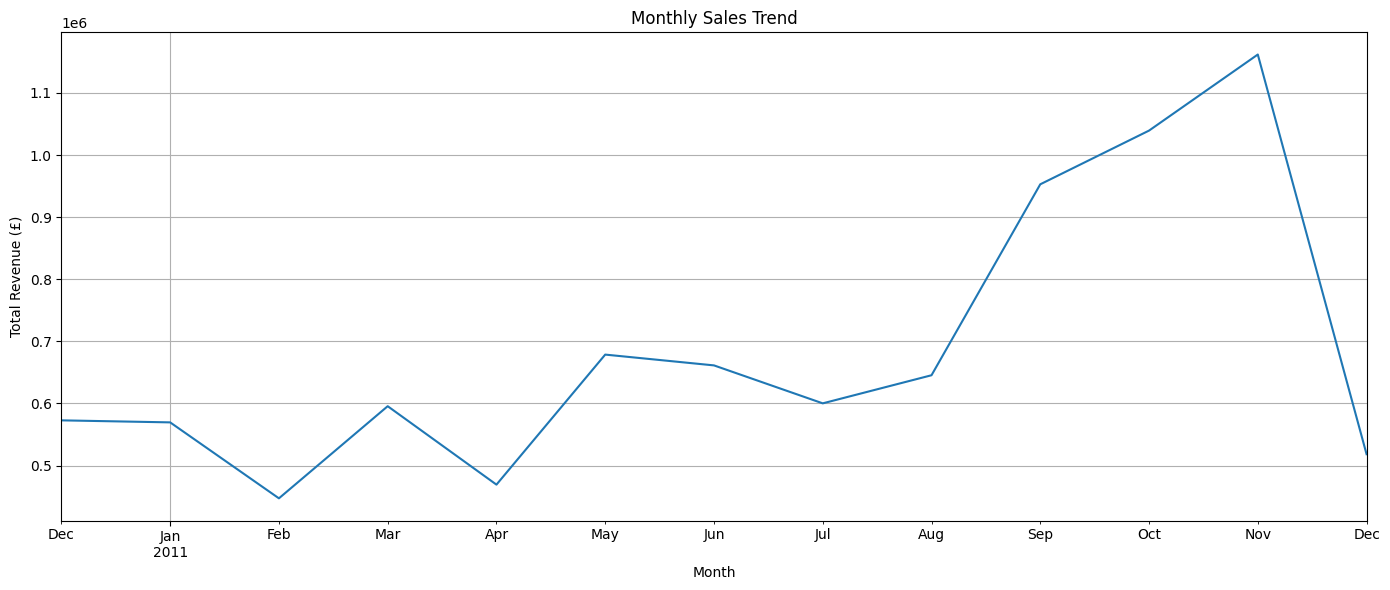

In [33]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalPrice'].sum()


import matplotlib.pyplot as plt
monthly_sales.plot(kind='line', figsize = (14,6), title = 'Monthly Sales Trend')
plt.ylabel('Total Revenue (£)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()
           

##### monthly sales trend 



# Recency, Frequency, Monetary Analysis

In [34]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending = False).head(10)
print(top_customers)    #### top customers (RFM) prep. 

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


In [36]:
### cheking the last purchase date 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Last Invoice Date:", df['InvoiceDate'].max())
                                   #### last invoice date is the 2011-12-09 12:50:00

Last Invoice Date: 2011-12-09 12:50:00


In [38]:
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

## calculating RFM values 

In [55]:
latest_date = df['InvoiceDate'].max()


rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,       ########### recency
    'InvoiceNo': 'nunique',  #### frequency
    'TotalPrice': 'sum'       #### monetary
}).reset_index()


rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


#### assigning RFM scores (1-5)

In [57]:
### ranking each metric into 5 buckets (1= least, 5 = best)

3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)


In [60]:
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,1,7,4310.00,5,5,5,555
2,12348.0,74,4,1797.24,2,4,4,244
3,12349.0,18,1,1757.55,4,1,4,414
4,12350.0,309,1,334.40,1,1,2,112


### customer segmentation 

In [70]:
def segment_customer(score):
    if score >= 445:
        return 'Top Customer'
    elif score >= 344:
        return 'Loyal Customer'
    elif score >= 233:
        return 'Potential Customer'
    else:
        return 'At Risk'

rfm['Segment'] = rfm[['R','F','M']].sum(axis=1).apply(segment_customer)
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,12346.0,325,1,77183.60,1,1,5,115,At Risk
1,12347.0,1,7,4310.00,5,5,5,555,At Risk
2,12348.0,74,4,1797.24,2,4,4,244,At Risk
3,12349.0,18,1,1757.55,4,1,4,414,At Risk
4,12350.0,309,1,334.40,1,1,2,112,At Risk
5,12352.0,35,8,2506.04,3,5,5,355,At Risk
6,12353.0,203,1,89.00,1,1,1,111,At Risk
7,12354.0,231,1,1079.40,1,1,4,114,At Risk
8,12355.0,213,1,459.40,1,1,2,112,At Risk
9,12356.0,22,3,2811.43,4,3,5,435,At Risk


## segment summary

In [71]:
segment_summary = rfm['Segment'].value_counts()
print(segment_summary)

Segment
At Risk    4339
Name: count, dtype: int64


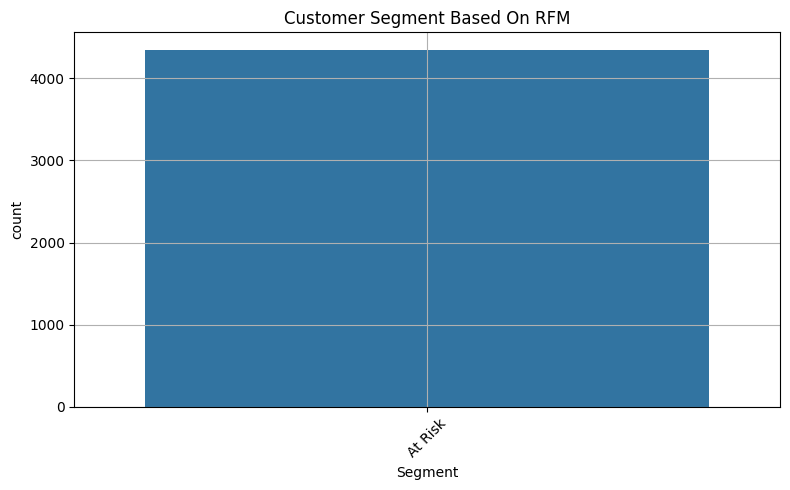

In [74]:
#### visualizing customer segmentation 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segment Based On RFM')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
### exporting segmented customers to excel
rfm.to_excel('segmented_customers.xlsx', index=False)
print("Customer segmentation exported to segmented_customers.xlsx")

Customer segmentation exported to segmented_customers.xlsx


### market basket analysis (MBA)

In [84]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [79]:
basket = df[df['Quantity'] > 0]
basket = basket[df['InvoiceNo'].astype(str).str.startswith('C') == False]

basket = (basket.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().fillna(0).applymap(lambda x: 1 if x >0 else 0))
                                                           

C:\Users\ganes\AppData\Local\Temp\ipykernel_12388\2285145640.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .sum().unstack().fillna(0).applymap(lambda x: 1 if x >0 else 0))


In [87]:
from mlxtend.frequent_patterns import apriori, association_rules


basket_filtered = basket.loc[:, basket.sum() > 50]


frequent_itemsets = apriori(basket_filtered, 
                            min_support=0.01, 
                            use_colnames=True, 
                            max_len=2, 
                            low_memory=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules = rules.sort_values(by='lift', ascending=False)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


C:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                         antecedents                      consequents  \
536       (REGENCY TEA PLATE GREEN )         (REGENCY TEA PLATE PINK)   
537         (REGENCY TEA PLATE PINK)       (REGENCY TEA PLATE GREEN )   
531       (REGENCY SUGAR BOWL GREEN)         (REGENCY MILK JUG PINK )   
530         (REGENCY MILK JUG PINK )       (REGENCY SUGAR BOWL GREEN)   
540       (REGENCY TEA PLATE ROSES )         (REGENCY TEA PLATE PINK)   
541         (REGENCY TEA PLATE PINK)       (REGENCY TEA PLATE ROSES )   
538       (REGENCY TEA PLATE GREEN )       (REGENCY TEA PLATE ROSES )   
539       (REGENCY TEA PLATE ROSES )       (REGENCY TEA PLATE GREEN )   
504     (POPPY'S PLAYHOUSE BEDROOM )  (POPPY'S PLAYHOUSE LIVINGROOM )   
505  (POPPY'S PLAYHOUSE LIVINGROOM )     (POPPY'S PLAYHOUSE BEDROOM )   

      support  confidence       lift  
536  0.010898    0.748148  61.909259  
537  0.010898    0.901786  61.909259  
531  0.011114    0.768657  52.381694  
530  0.011114    0.757353  52.381694  
5

In [89]:
rfm.to_csv('cleaned_data.csv', index=False)


In [3]:
df.to_csv("cleaned_online_retail.csv", index=False)